In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.ticker as ticker
from math import sqrt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [94]:
dataset_excel = pd.ExcelFile('Superior_Auto.xlsx')

In [95]:
def plot(dataset):
    plt.xlabel("Year")
    plt.ylabel("Sales per Dealership")
    plt.plot(dataset)

In [96]:
def predict_model(dataset_excel,name,d=1, p =1, q =1):
    
    df = pd.read_excel(dataset_excel, name)
    
    # Convert to DataFrame
    df = df.rename(columns={'Sales per Dealership': 'Sales'})
    df = df.sort_values(by='Year', ascending=True)
    df.set_index('Year', inplace=True)
    


    # Check for stationarity
    result = adfuller(df['Sales'])
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

    # Differencing to achieve stationarity (if needed)
    df['Sales_diff'] = df['Sales'] - df['Sales'].shift(1)
    df.dropna(inplace=True)


    # Re-check for stationarity
    result_diff = adfuller(df['Sales_diff'])
    print(f'ADF Statistic after Differencing: {result_diff[0]}')
    print(f'p-value after Differencing: {result_diff[1]}')

    print()
    print()


    # Plot ACF and PACF for differenced series
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plot_acf(df['Sales_diff'], lags=2, ax=plt.gca())
    plt.title('ACF of Differenced Series')

    plt.subplot(1, 2, 2)
    plot_pacf(df['Sales_diff'], lags=2, ax=plt.gca())
    plt.title('PACF of Differenced Series')

    plt.show()
    

    # Fit ARIMA model (order p, d, q)
    model = ARIMA(df['Sales'], order=(p,d,q))
    model_fit = model.fit()

    # Generate in-sample predictions
    in_sample_preds = model_fit.predict(start=0, end=len(df)-1)

    #forecast 
    print("The forecast for the next three years are : ")
    future_values = model_fit.forecast(steps = 3 )
    print(future_values)


    # Calculate errors
    mae = mean_absolute_error(df['Sales'], in_sample_preds)
    mse = mean_squared_error(df['Sales'], in_sample_preds)
    rmse = np.sqrt(mse)

    print()

    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

    out_sample_preds = model_fit.predict(start=0, end=len(df)+2)
    future_dates = list(df.index)
    future_dates.extend({2024,2025,2026})
    

    # Plot actual vs. fitted values
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Sales'], label='Actual', marker='o')
    plt.plot(future_dates, out_sample_preds, label='Predicted', color='red', linestyle='--')
    plt.title(f'Actual Sales vs. Predicted Sales for {name} State', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    plt.legend()

    # Format y-axis as millions
    formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x * 1e-6)}M')
    plt.gca().yaxis.set_major_formatter(formatter)

    # Add grid
    plt.grid(True)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    #years = df.index.Year.unique().tolist() + future_dates.Year.unique().tolist()
    plt.gca().set_xticks(future_dates)
    plt.gca().set_xticklabels(future_dates)
    
    
    # Add annotations for actual values
    for x, y in zip(df.index, df['Sales']):
        plt.text(x, y, f'{int(y * 1e-6)}M', fontsize=9, ha='right', va='bottom', color='blue', 
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))
        
    # Add annotations for fitted values
    for x, y in zip(future_dates, out_sample_preds):
        plt.text(x, y, f'{int(y * 1e-6)}M', fontsize=9, ha='right', va='bottom', color='red', 
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))
    # Add annotations for forecasted values
    #for x, y in zip(future_dates, future_forecasts):
     #   plt.text(x, y, f'{int(y * 1e-6)}M', fontsize=9, ha='right', va='bottom', color='green')


    # Show the plot
    plt.show()
    
    return model_fit

ADF Statistic: -0.003944710127980374
p-value: 0.9582046429754448
ADF Statistic after Differencing: -4.415585026285416
p-value after Differencing: 0.00027853803215387824




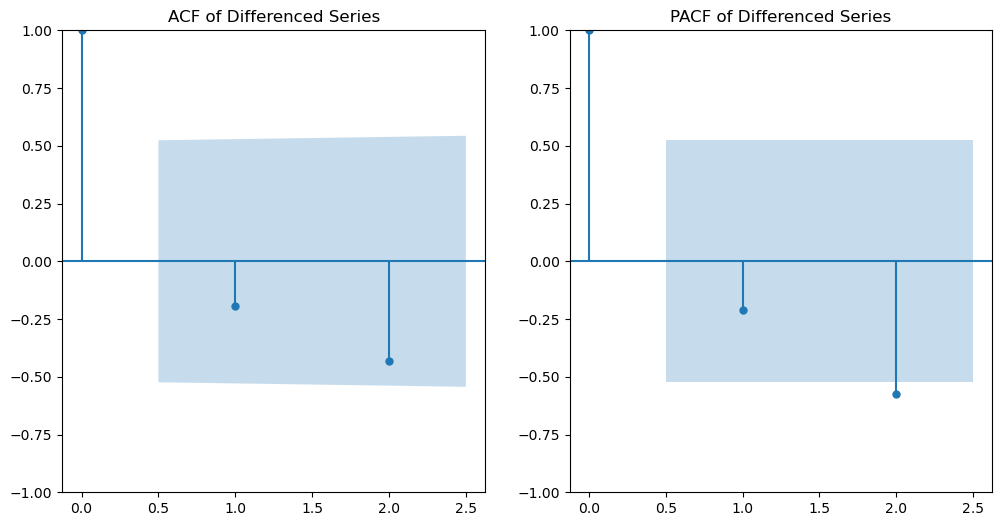

The forecast for the next three years are : 
14    7.184542e+07
15    7.217351e+07
16    7.198485e+07
Name: predicted_mean, dtype: float64

MAE: 6360975.550885536
MSE: 100276688856547.75
RMSE: 10013824.886453116


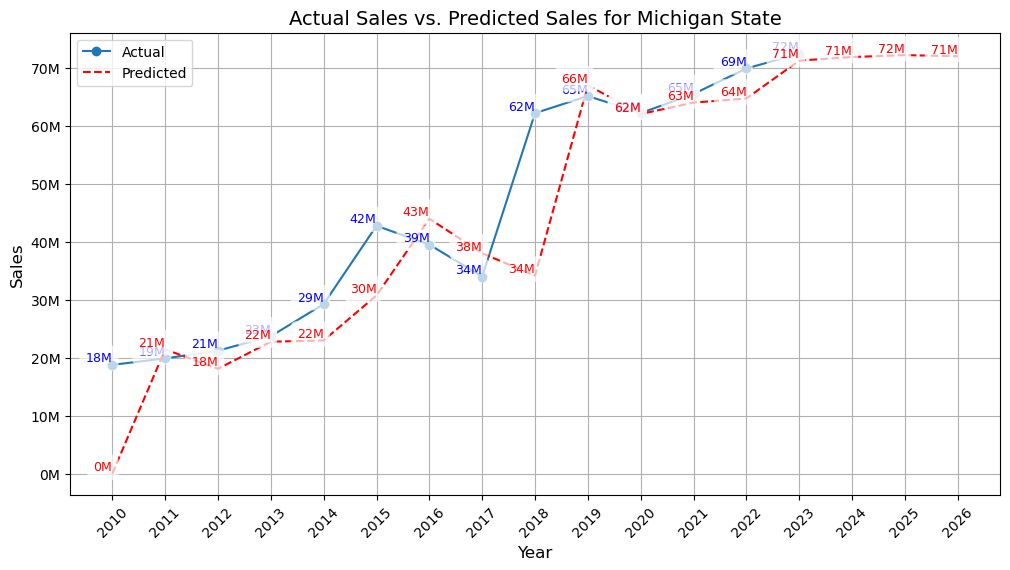

In [97]:
predict_model(dataset_excel,"Michigan",d=1, p =1, q =1)

ADF Statistic: 1.3808742908636364
p-value: 0.9970255010652279
ADF Statistic after Differencing: -1.1629800923926574
p-value after Differencing: 0.6893146680738576




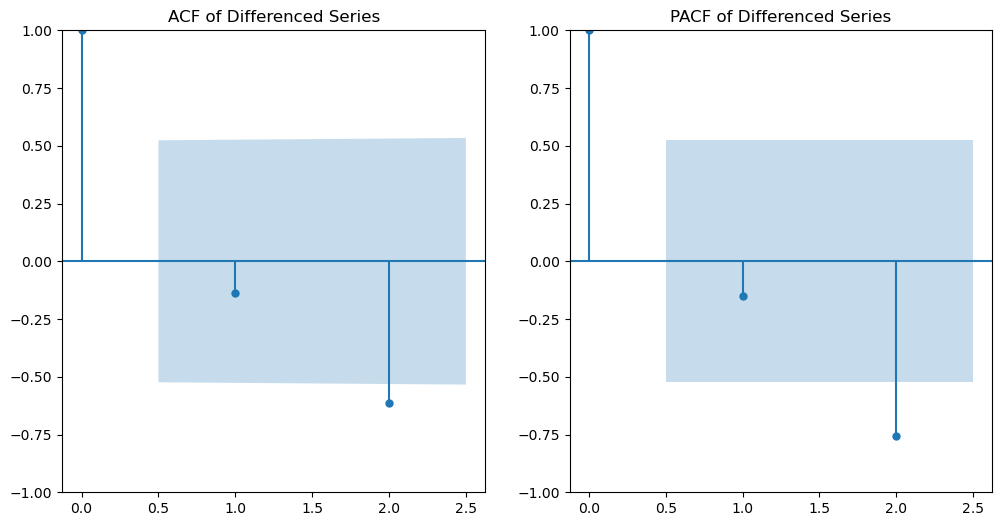

The forecast for the next three years are : 
14    6.128328e+07
15    6.078180e+07
16    6.101099e+07
Name: predicted_mean, dtype: float64

MAE: 5127130.144372208
MSE: 73193490541981.14
RMSE: 8555319.429570187


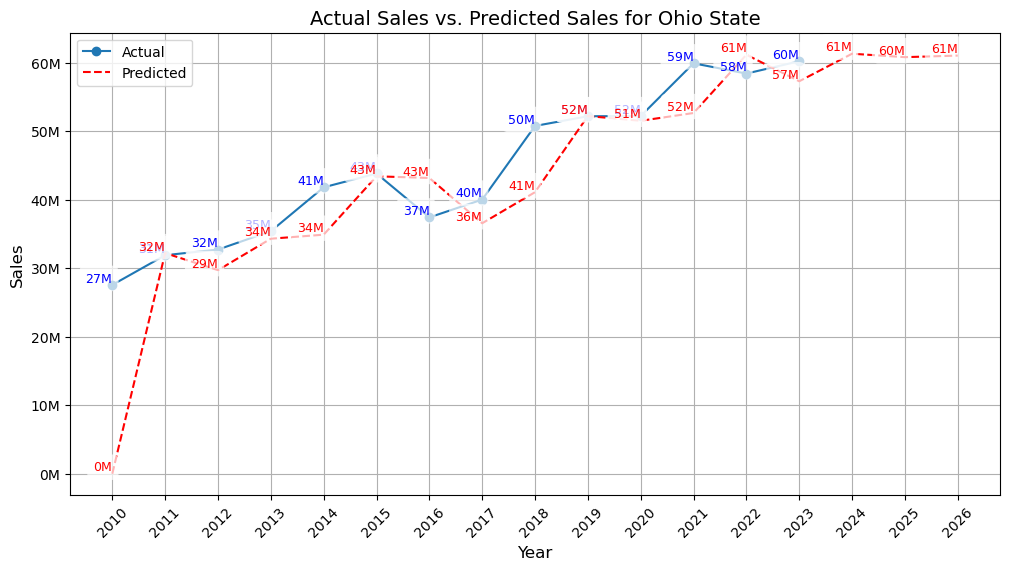

In [98]:
predict_model(dataset_excel,"Ohio",d=1, p =1, q =1)

ADF Statistic: -0.8367203653932558
p-value: 0.8080971161870518
ADF Statistic after Differencing: -2.9784875079923365
p-value after Differencing: 0.03695282253561541




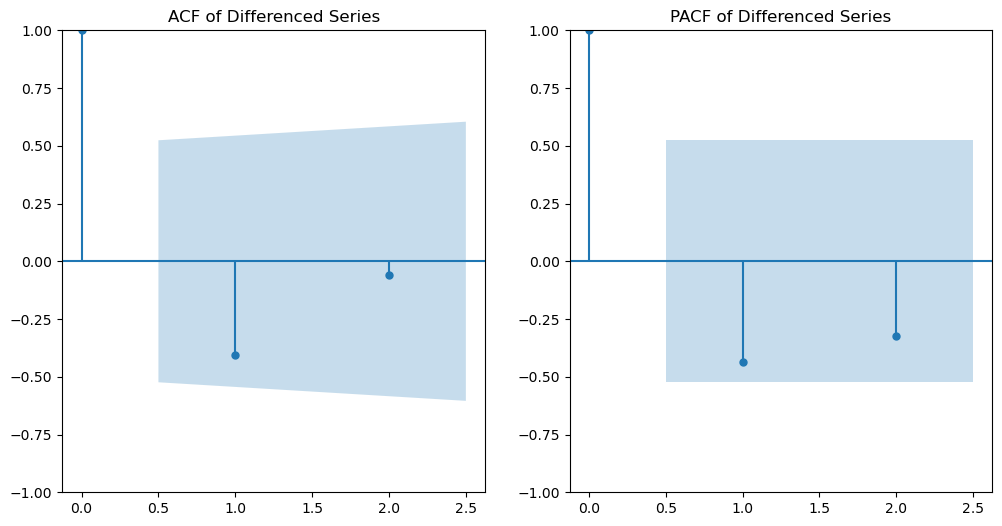

The forecast for the next three years are : 
14    5.245674e+07
15    5.420629e+07
16    5.593979e+07
Name: predicted_mean, dtype: float64

MAE: 4264447.610066182
MSE: 54927886626772.984
RMSE: 7411335.009751818


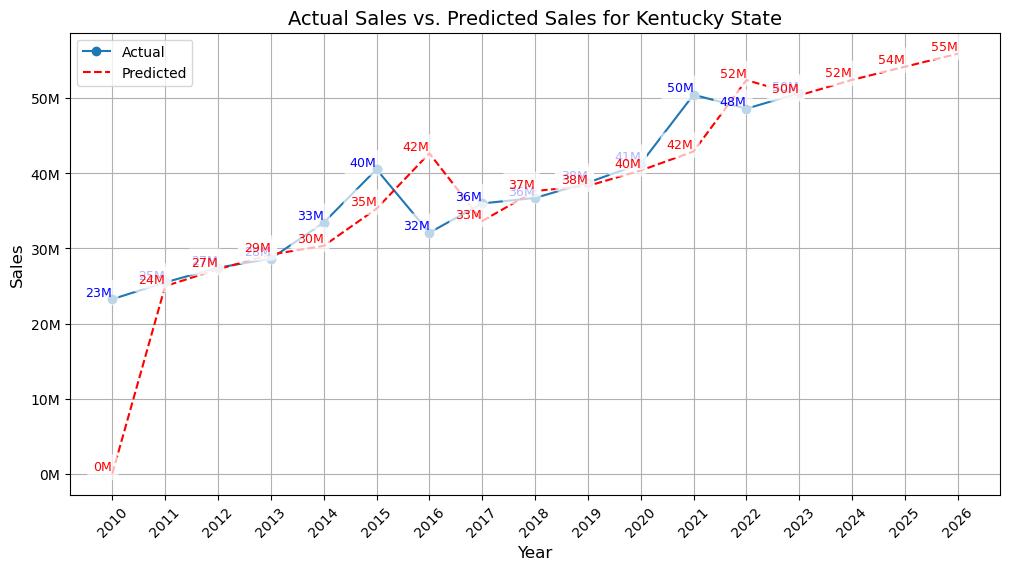

In [99]:
predict_model(dataset_excel,"Kentucky",d=1, p =1, q =1)

ADF Statistic: -1.4050194706357346
p-value: 0.5798673694799295
ADF Statistic after Differencing: -3.0702002497319048
p-value after Differencing: 0.02883855456602825




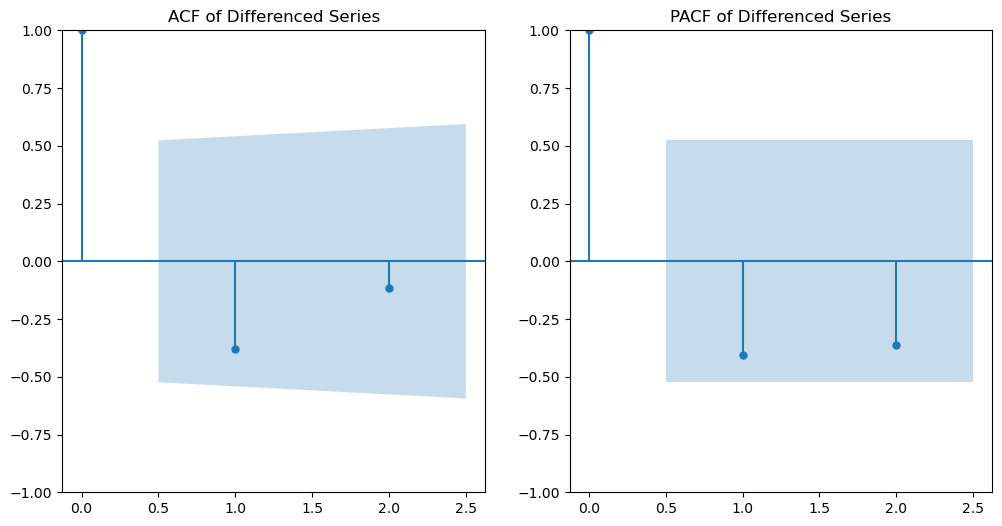

The forecast for the next three years are : 
14    5.629807e+07
15    5.606025e+07
16    5.607728e+07
Name: predicted_mean, dtype: float64

MAE: 8271888.994558627
MSE: 133190505248123.52
RMSE: 11540819.089134164


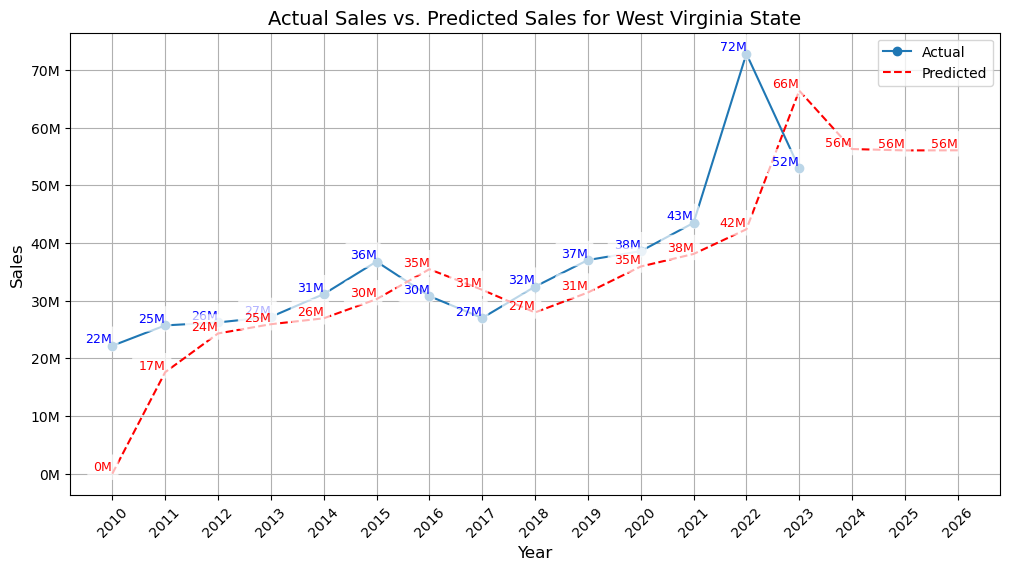

In [100]:
predict_model(dataset_excel,"West Virginia",d=1, p =1, q =1)

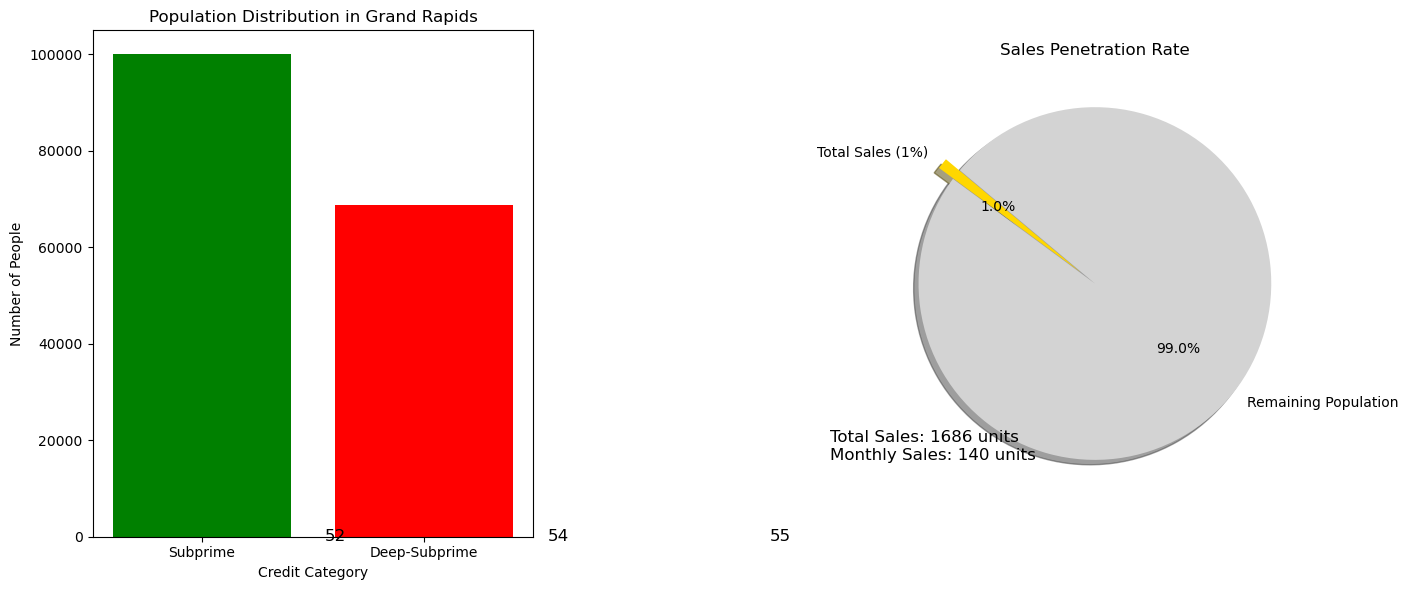

In [101]:
import matplotlib.pyplot as plt

# Data
categories = ['Subprime', 'Deep-Subprime']
values = [99911, 68689]
total_population = sum(values)
penetration_rate = 0.01
total_sales = int(total_population * penetration_rate)
monthly_sales = total_sales // 12

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for population distribution
ax[0].bar(categories, values, color=['green', 'red'])
ax[0].set_title('Population Distribution in Grand Rapids')
ax[0].set_ylabel('Number of People')
ax[0].set_xlabel('Credit Category')

# Annotate the bar plot
for bar in bars:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height}', ha='center', va='center', fontsize=12, color='black')


# Pie chart for sales distribution
labels = ['Total Sales (1%)', 'Remaining Population']
sizes = [total_sales, total_population - total_sales]
colors = ['gold', 'lightgrey']
explode = (0.1, 0)  # explode the first slice

ax[1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax[1].set_title('Sales Penetration Rate')

# Add annotations for the pie chart
ax[1].text(-1.5, -1, f'Total Sales: {total_sales} units\nMonthly Sales: {monthly_sales} units', fontsize=12)

plt.tight_layout()
plt.show()


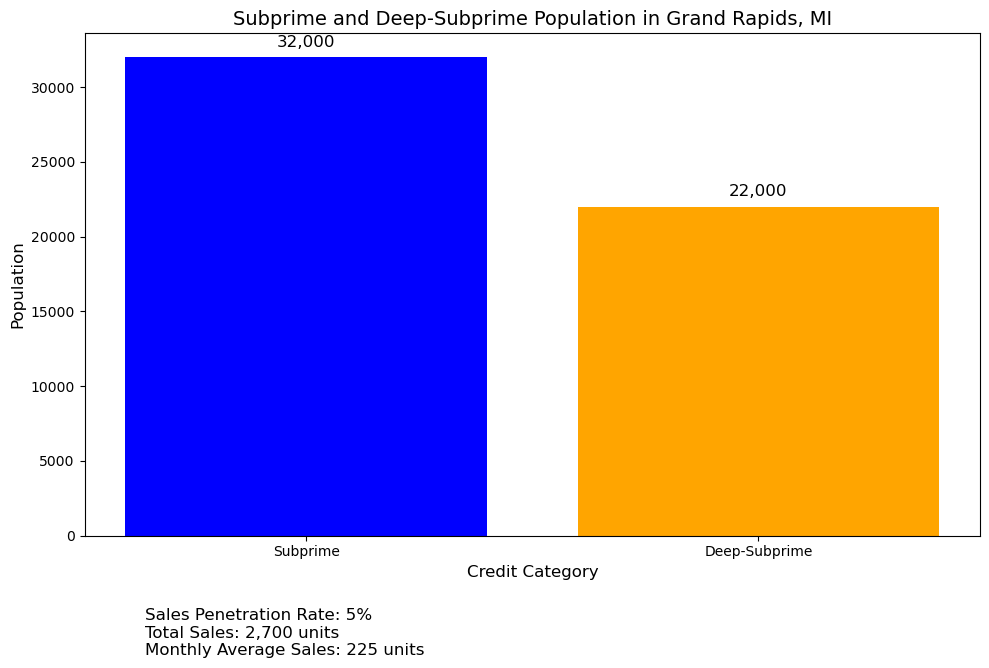

In [102]:
import matplotlib.pyplot as plt

# Data for the plot
categories = ['Subprime', 'Deep-Subprime']
populations = [32000, 22000]
sales_penetration_rate = 0.05
total_sales = sum(populations) * sales_penetration_rate
monthly_average_sales = total_sales / 12

# Plotting the population distribution
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(categories, populations, color=['blue', 'orange'])

# Adding text annotations
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{int(yval):,}', ha='center', va='bottom', fontsize=12)

# Adding titles and labels
ax.set_title('Subprime and Deep-Subprime Population in Grand Rapids, MI', fontsize=14)
ax.set_ylabel('Population', fontsize=12)
ax.set_xlabel('Credit Category', fontsize=12)

# Adding total sales and monthly average to the plot
plt.figtext(0.15, -0.1, f'Sales Penetration Rate: {sales_penetration_rate*100:.0f}%\n'
                        f'Total Sales: {int(total_sales):,} units\n'
                        f'Monthly Average Sales: {int(monthly_average_sales):,} units', fontsize=12, ha='left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


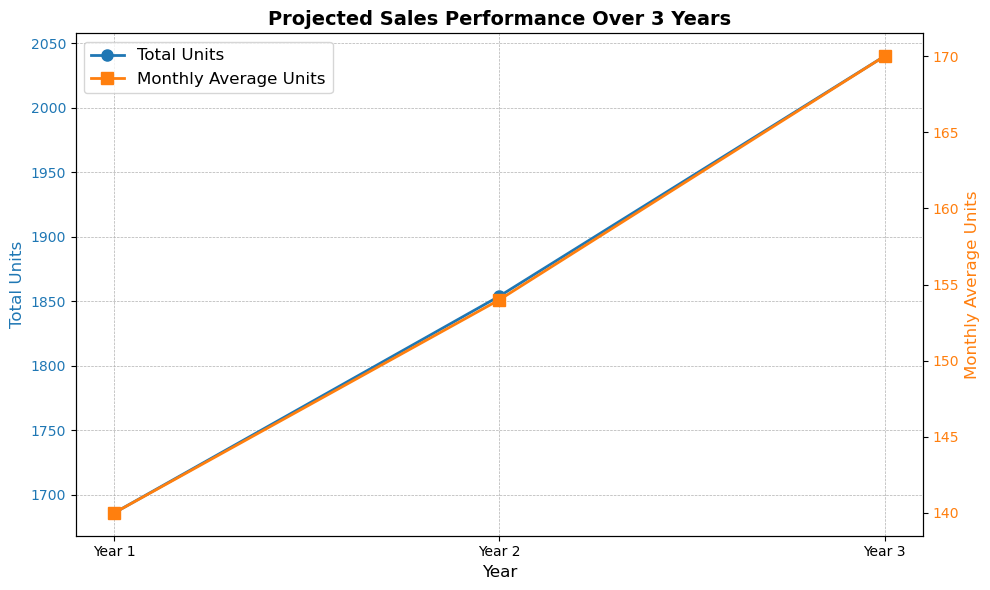

In [103]:
import matplotlib.pyplot as plt

# Data for the plot
years = ['Year 1', 'Year 2', 'Year 3']
total_units = [1686, 1854, 2040]
monthly_average = [140, 154, 170]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total units
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Units', color='tab:blue', fontsize=12)
ax1.plot(years, total_units, color='tab:blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Total Units')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create a second y-axis to plot the monthly average
ax2 = ax1.twinx()
ax2.set_ylabel('Monthly Average Units', color='tab:orange', fontsize=12)
ax2.plot(years, monthly_average, color='tab:orange', marker='s', linestyle='-', linewidth=2, markersize=8, label='Monthly Average Units')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title
plt.title('Projected Sales Performance Over 3 Years', fontsize=14, fontweight='bold')

# Adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

# Show the plot
fig.tight_layout()
plt.show()


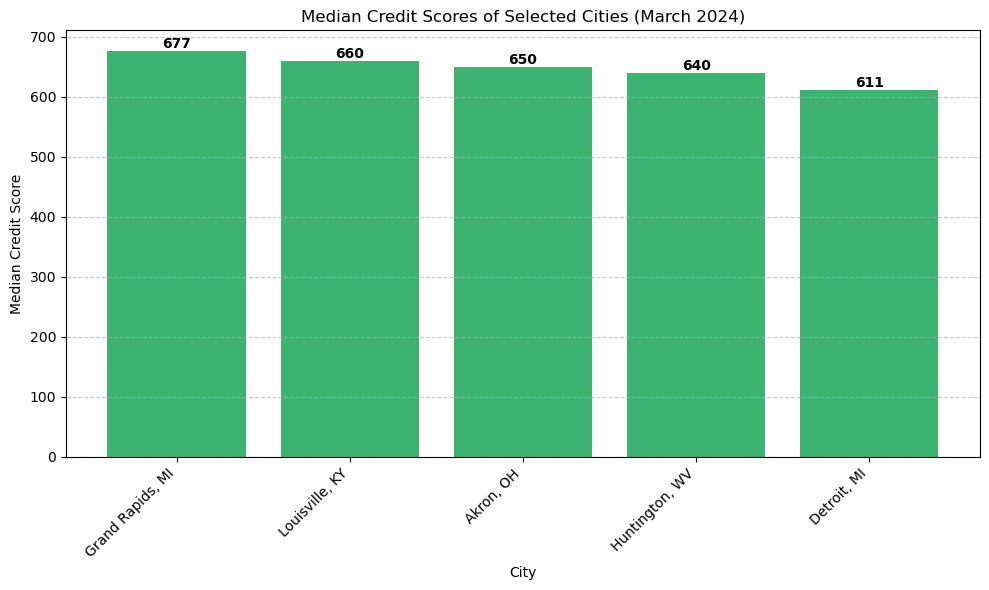

In [104]:
import matplotlib.pyplot as plt

# City data for March 2024
city_data = {
    "Grand Rapids, MI": 677,
    "Huntington, WV": 640,
    "Detroit, MI": 611,
    "Akron, OH": 650,
    "Louisville, KY": 660
}

# Sort the city data by credit score in descending order
sorted_city_data = dict(sorted(city_data.items(), key=lambda item: item[1], reverse=True))

# Extracting sorted city names and credit scores
cities = list(sorted_city_data.keys())
scores = list(sorted_city_data.values())

# Create the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, scores, color='mediumseagreen')

# Adding titles and labels
plt.title('Median Credit Scores of Selected Cities (March 2024)')
plt.xlabel('City')
plt.ylabel('Median Credit Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with median credit score values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval}', va='bottom', ha='center', fontsize=10, fontweight='bold', color='black')

# Show the plot
plt.tight_layout()
plt.show()


In [105]:
import pandas as pd

# Data
data = {
    "City": ["Grand Rapids, MI", "Huntington, WV", "Detroit, MI", "Akron, OH", "Louisville, KY"],
    "Median Credit Score": [677, 640, 611, 650, 660],
    "Population": [196908, 45746, 620376, 188701, 624444]
}

# Create a DataFrame
df = pd.DataFrame(data)


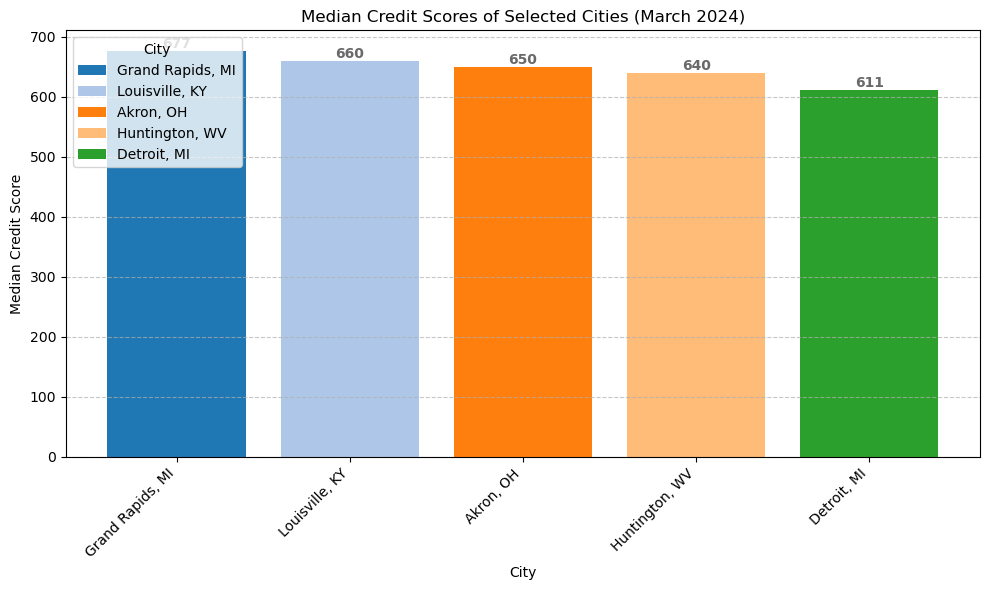

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    "City": ["Grand Rapids, MI", "Huntington, WV", "Detroit, MI", "Akron, OH", "Louisville, KY"],
    "Median Credit Score": [677, 640, 611, 650, 660]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by Median Credit Score in descending order
df = df.sort_values(by="Median Credit Score", ascending=False)

# Define colors for each city
colors = plt.cm.tab20.colors

# Bar plot for Median Credit Score
plt.figure(figsize=(10, 6))
bars = plt.bar(df["City"], df["Median Credit Score"], color=colors[:len(df)])

# Adding titles and labels
plt.title('Median Credit Scores of Selected Cities (March 2024)')
plt.xlabel('City')
plt.ylabel('Median Credit Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with median credit score values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval}', va='bottom', ha='center', fontsize=10, fontweight='bold', color='dimgrey')

# Add legend with city names
plt.legend(bars, df["City"], title="City", loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


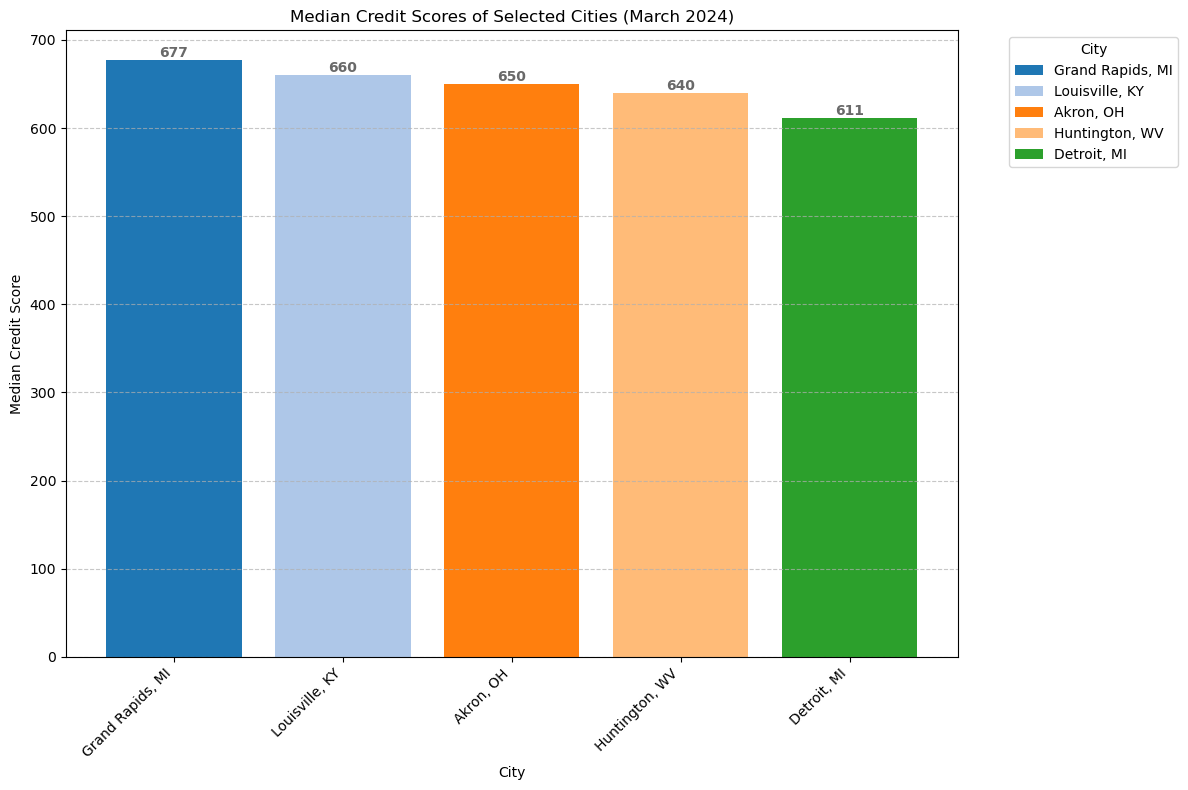

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    "City": ["Grand Rapids, MI", "Huntington, WV", "Detroit, MI", "Akron, OH", "Louisville, KY"],
    "Median Credit Score": [677, 640, 611, 650, 660]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by Median Credit Score in descending order
df = df.sort_values(by="Median Credit Score", ascending=False)

# Define colors for each city
colors = plt.cm.tab20.colors

# Bar plot for Median Credit Score
plt.figure(figsize=(12, 8))
bars = plt.bar(df["City"], df["Median Credit Score"], color=colors[:len(df)])

# Adding titles and labels
plt.title('Median Credit Scores of Selected Cities (March 2024)')
plt.xlabel('City')
plt.ylabel('Median Credit Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with median credit score values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval}', va='bottom', ha='center', fontsize=10, fontweight='bold', color='dimgrey')

# Add legend with city names
plt.legend(bars, df["City"], title="City", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for legend
plt.tight_layout()

# Show the plot
plt.show()


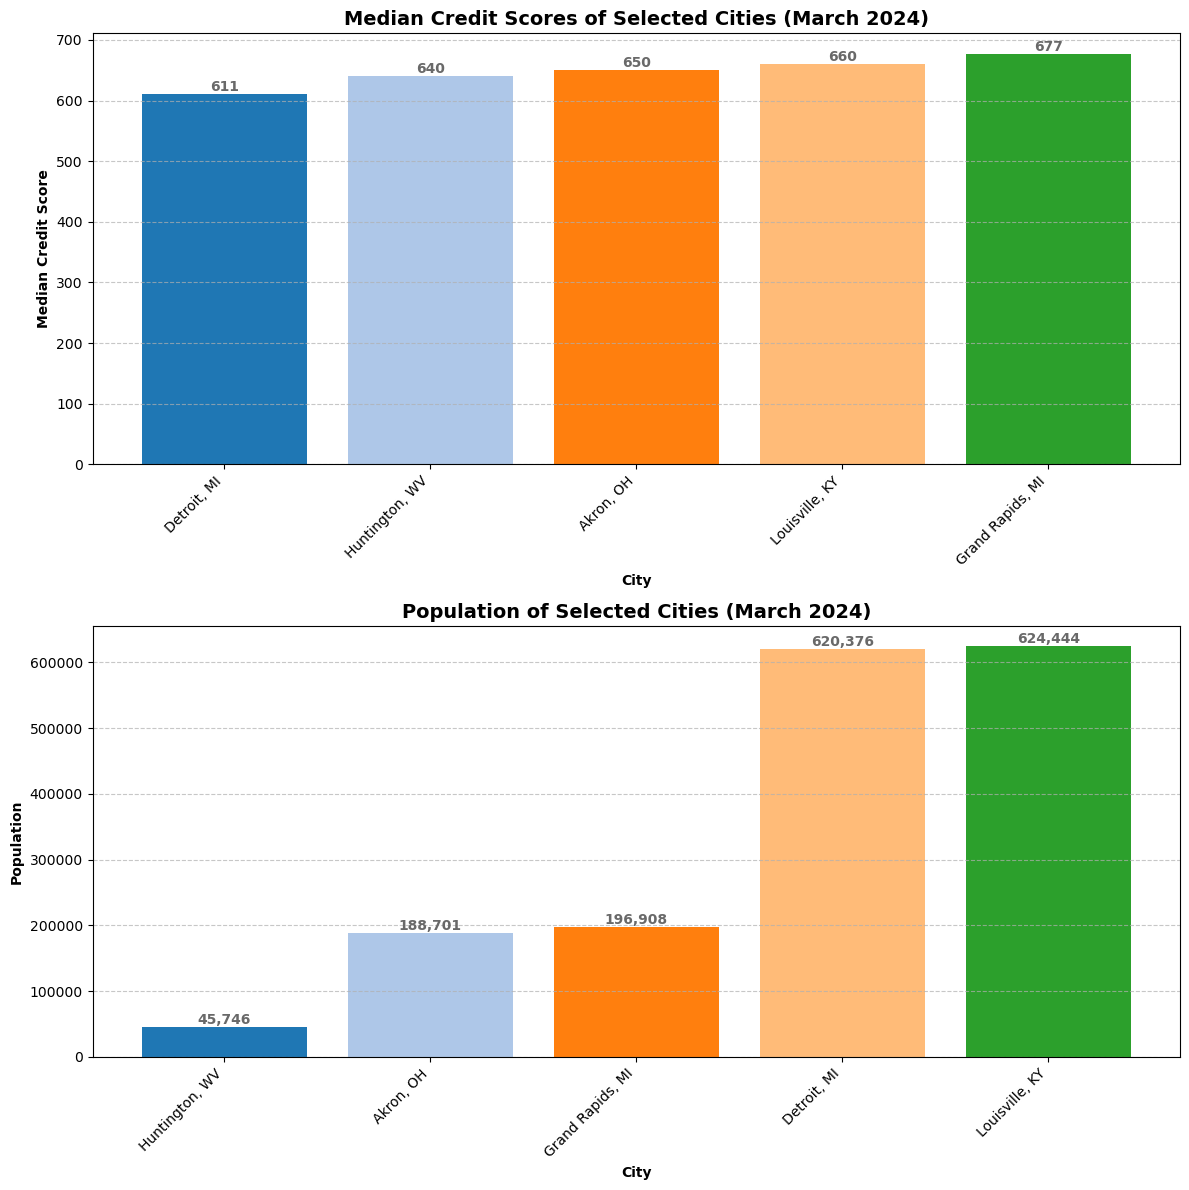

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    "City": ["Grand Rapids, MI", "Huntington, WV", "Detroit, MI", "Akron, OH", "Louisville, KY"],
    "Median Credit Score": [677, 640, 611, 650, 660],
    "Population": [196908, 45746, 620376, 188701, 624444]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by Median Credit Score in ascending order
df_sorted_credit = df.sort_values(by="Median Credit Score", ascending=True)

# Sort DataFrame by Population in ascending order
df_sorted_population = df.sort_values(by="Population", ascending=True)

# Define colors for each city
colors = plt.cm.tab20.colors

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plot Median Credit Score
bars1 = ax1.bar(df_sorted_credit["City"], df_sorted_credit["Median Credit Score"], color=colors[:len(df)])
ax1.set_title('Median Credit Scores of Selected Cities (March 2024)', fontsize=14, fontweight='bold')
ax1.set_xlabel('City', fontweight='bold')
ax1.set_ylabel('Median Credit Score', fontweight='bold')
ax1.set_xticklabels(df_sorted_credit["City"], rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate Median Credit Score bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval}', va='bottom', ha='center', fontsize=10, fontweight='bold', color='dimgrey')

# Plot Population
bars2 = ax2.bar(df_sorted_population["City"], df_sorted_population["Population"], color=colors[:len(df)])
ax2.set_title('Population of Selected Cities (March 2024)', fontsize=14, fontweight='bold')
ax2.set_xlabel('City', fontweight='bold')
ax2.set_ylabel('Population', fontweight='bold')
ax2.set_xticklabels(df_sorted_population["City"], rotation=45, ha='right')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate Population bars
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,}', va='bottom', ha='center', fontsize=10, fontweight='bold', color='dimgrey')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


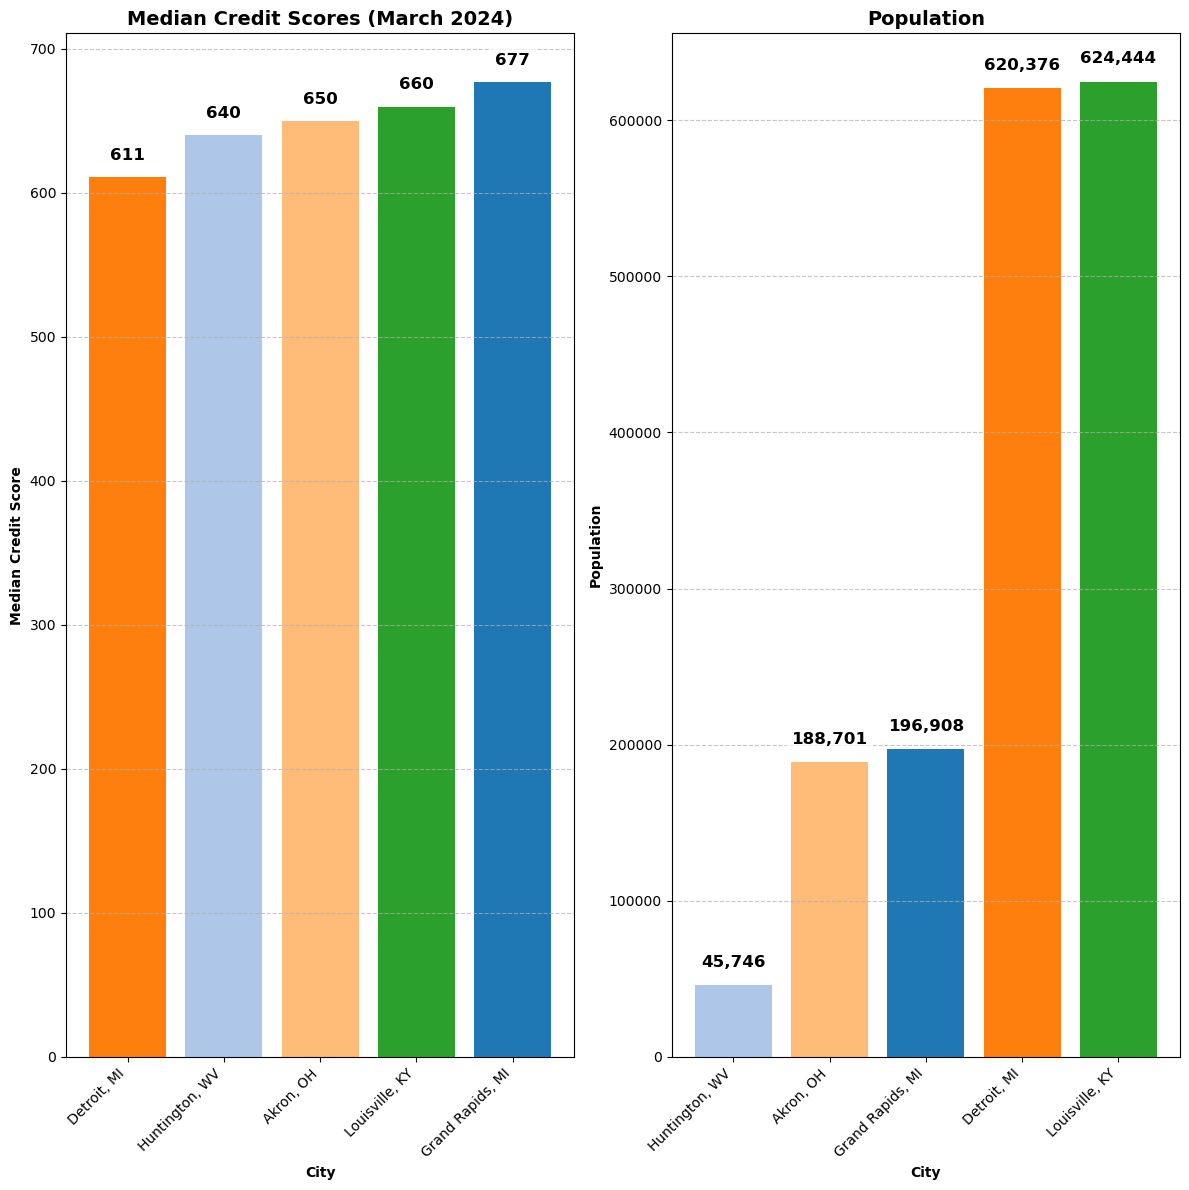

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    "City": ["Grand Rapids, MI", "Huntington, WV", "Detroit, MI", "Akron, OH", "Louisville, KY"],
    "Median Credit Score": [677, 640, 611, 650, 660],
    "Population": [196908, 45746, 620376, 188701, 624444]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by Median Credit Score in ascending order
df_sorted_credit = df.sort_values(by="Median Credit Score", ascending=True)

# Sort DataFrame by Population in ascending order
df_sorted_population = df.sort_values(by="Population", ascending=True)

# Define colors for each city
colors = plt.cm.tab20.colors
color_map = {city: colors[i] for i, city in enumerate(df["City"])}

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

# Plot Median Credit Score
bars1 = ax1.bar(df_sorted_credit["City"], df_sorted_credit["Median Credit Score"],
                color=[color_map[city] for city in df_sorted_credit["City"]])
ax1.set_title('Median Credit Scores (March 2024)', fontsize=14, fontweight='bold')
ax1.set_xlabel('City', fontweight='bold')
ax1.set_ylabel('Median Credit Score', fontweight='bold')
ax1.set_xticklabels(df_sorted_credit["City"], rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate Median Credit Score bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval + 10, f'{yval}', va='bottom', ha='center',
             fontsize=12, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Plot Population
bars2 = ax2.bar(df_sorted_population["City"], df_sorted_population["Population"],
                color=[color_map[city] for city in df_sorted_population["City"]])
ax2.set_title('Population', fontsize=14, fontweight='bold')
ax2.set_xlabel('City', fontweight='bold')
ax2.set_ylabel('Population', fontweight='bold')
ax2.set_xticklabels(df_sorted_population["City"], rotation=45, ha='right')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate Population bars
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, yval + 10000, f'{yval:,}', va='bottom', ha='center',
             fontsize=12, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


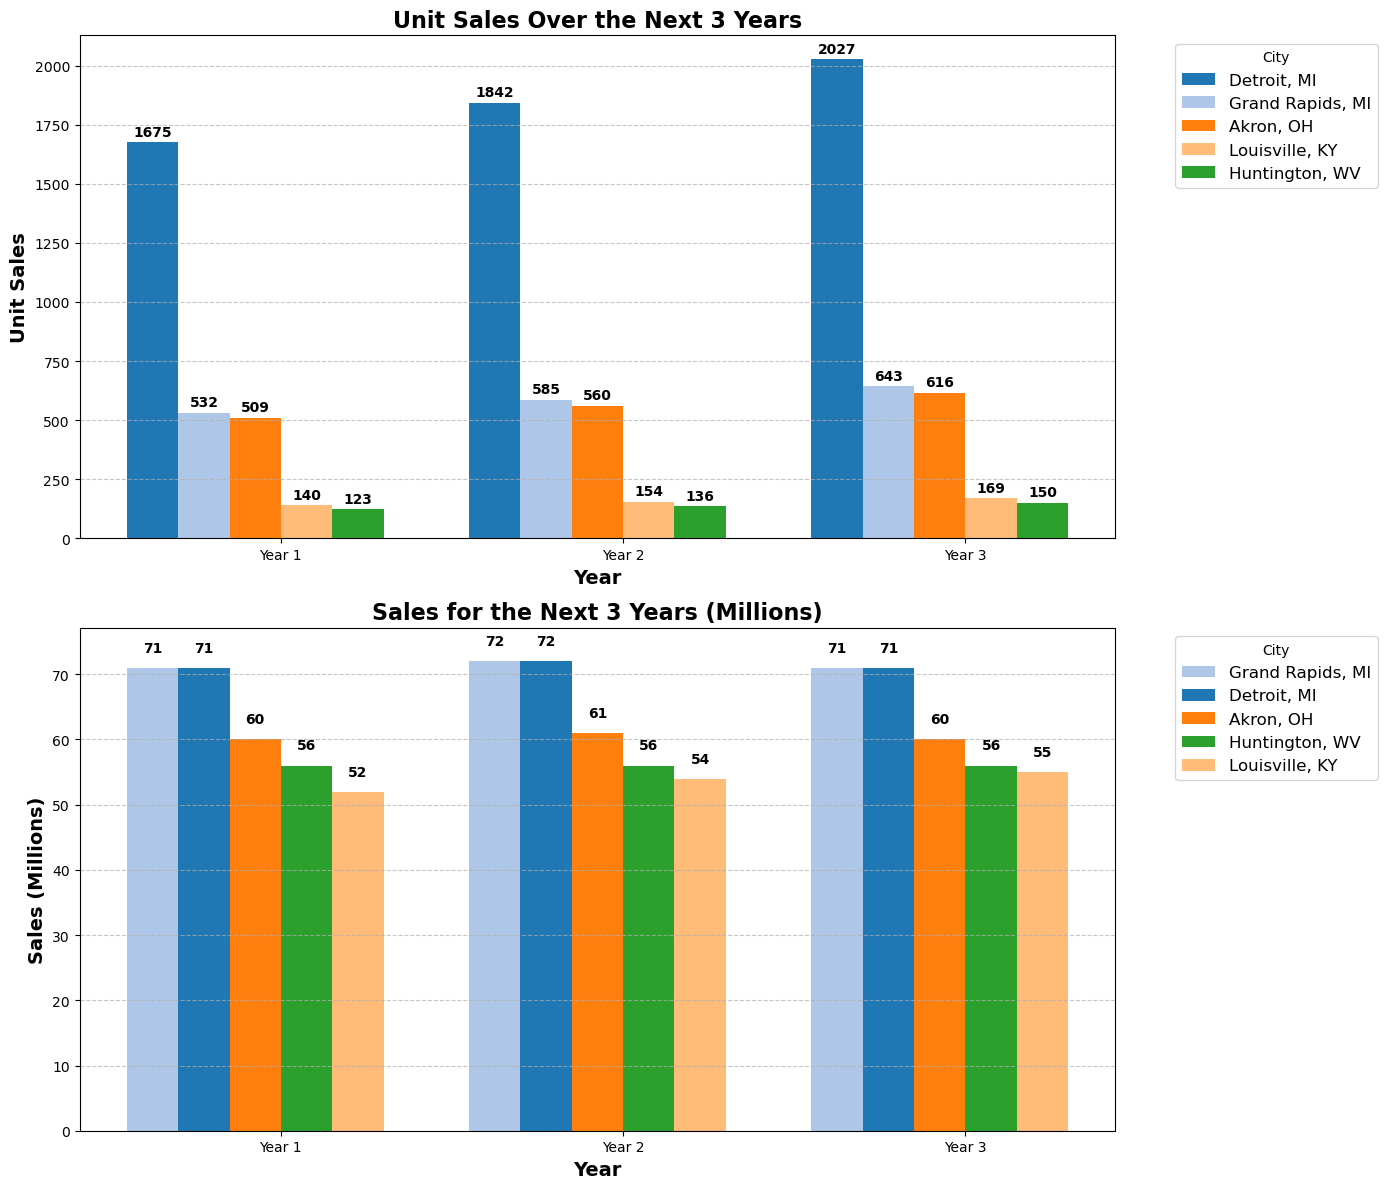

In [109]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    "City": ["Grand Rapids, MI", "Huntington, WV", "Detroit, MI", "Akron, OH", "Louisville, KY"],
    "Unit sales Year 1": [532, 123, 1675, 509, 140],
    "Unit sales Year 2": [585, 136, 1842, 560, 154],
    "Unit sales Year 3": [643, 150, 2027, 616, 169],
    "Sales for Year 1 (Millions)": [71, 56, 71, 60, 52],
    "Sales for Year 2 (Millions)": [72, 56, 72, 61, 54],
    "Sales for Year 3 (Millions)": [71, 56, 71, 60, 55]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by 'Unit sales Year 3' in descending order
df_sorted_units = df.sort_values(by='Unit sales Year 3', ascending=False)

# Sort DataFrame by 'Sales for Year 3 (Millions)' in descending order
df_sorted_sales = df.sort_values(by='Sales for Year 3 (Millions)', ascending=False)

# Set the 'City' column as the index
df_sorted_units.set_index('City', inplace=True)
df_sorted_sales.set_index('City', inplace=True)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Define the years and bar width
years = ['Year 1', 'Year 2', 'Year 3']
bar_width = 0.15
x = range(len(years))

# Define colors for the cities
colors = plt.cm.tab20.colors
color_map = {city: colors[i] for i, city in enumerate(df_sorted_units.index)}

# Bar Chart for Unit Sales
for i, city in enumerate(df_sorted_units.index):
    bars = ax1.bar([p + bar_width*i for p in x], df_sorted_units.loc[city, 'Unit sales Year 1':'Unit sales Year 3'], bar_width,
                   label=city, color=color_map[city])

    # Add value annotations
    for bar in bars:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2.0, yval + 15, f'{yval}', ha='center', va='bottom',
                 fontsize=10, fontweight='bold', color='black')

ax1.set_title('Unit Sales Over the Next 3 Years', fontsize=16, fontweight='bold')
ax1.set_xlabel('Year', fontsize=14, fontweight='bold')
ax1.set_ylabel('Unit Sales', fontsize=14, fontweight='bold')
ax1.set_xticks([p + bar_width*(len(df_sorted_units.index)/2) for p in x])  # Center x-ticks
ax1.set_xticklabels(years)
ax1.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Bar Chart for Sales
for i, city in enumerate(df_sorted_sales.index):
    bars = ax2.bar([p + bar_width*i for p in x], df_sorted_sales.loc[city, 'Sales for Year 1 (Millions)':'Sales for Year 3 (Millions)'], bar_width,
                   label=city, color=color_map[city])

    # Add value annotations
    for bar in bars:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2.0, yval + 2, f'{yval}', ha='center', va='bottom',
                 fontsize=10, fontweight='bold', color='black')

ax2.set_title('Sales for the Next 3 Years (Millions)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Year', fontsize=14, fontweight='bold')
ax2.set_ylabel('Sales (Millions)', fontsize=14, fontweight='bold')
ax2.set_xticks([p + bar_width*(len(df_sorted_sales.index)/2) for p in x])  # Center x-ticks
ax2.set_xticklabels(years)
ax2.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.02)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


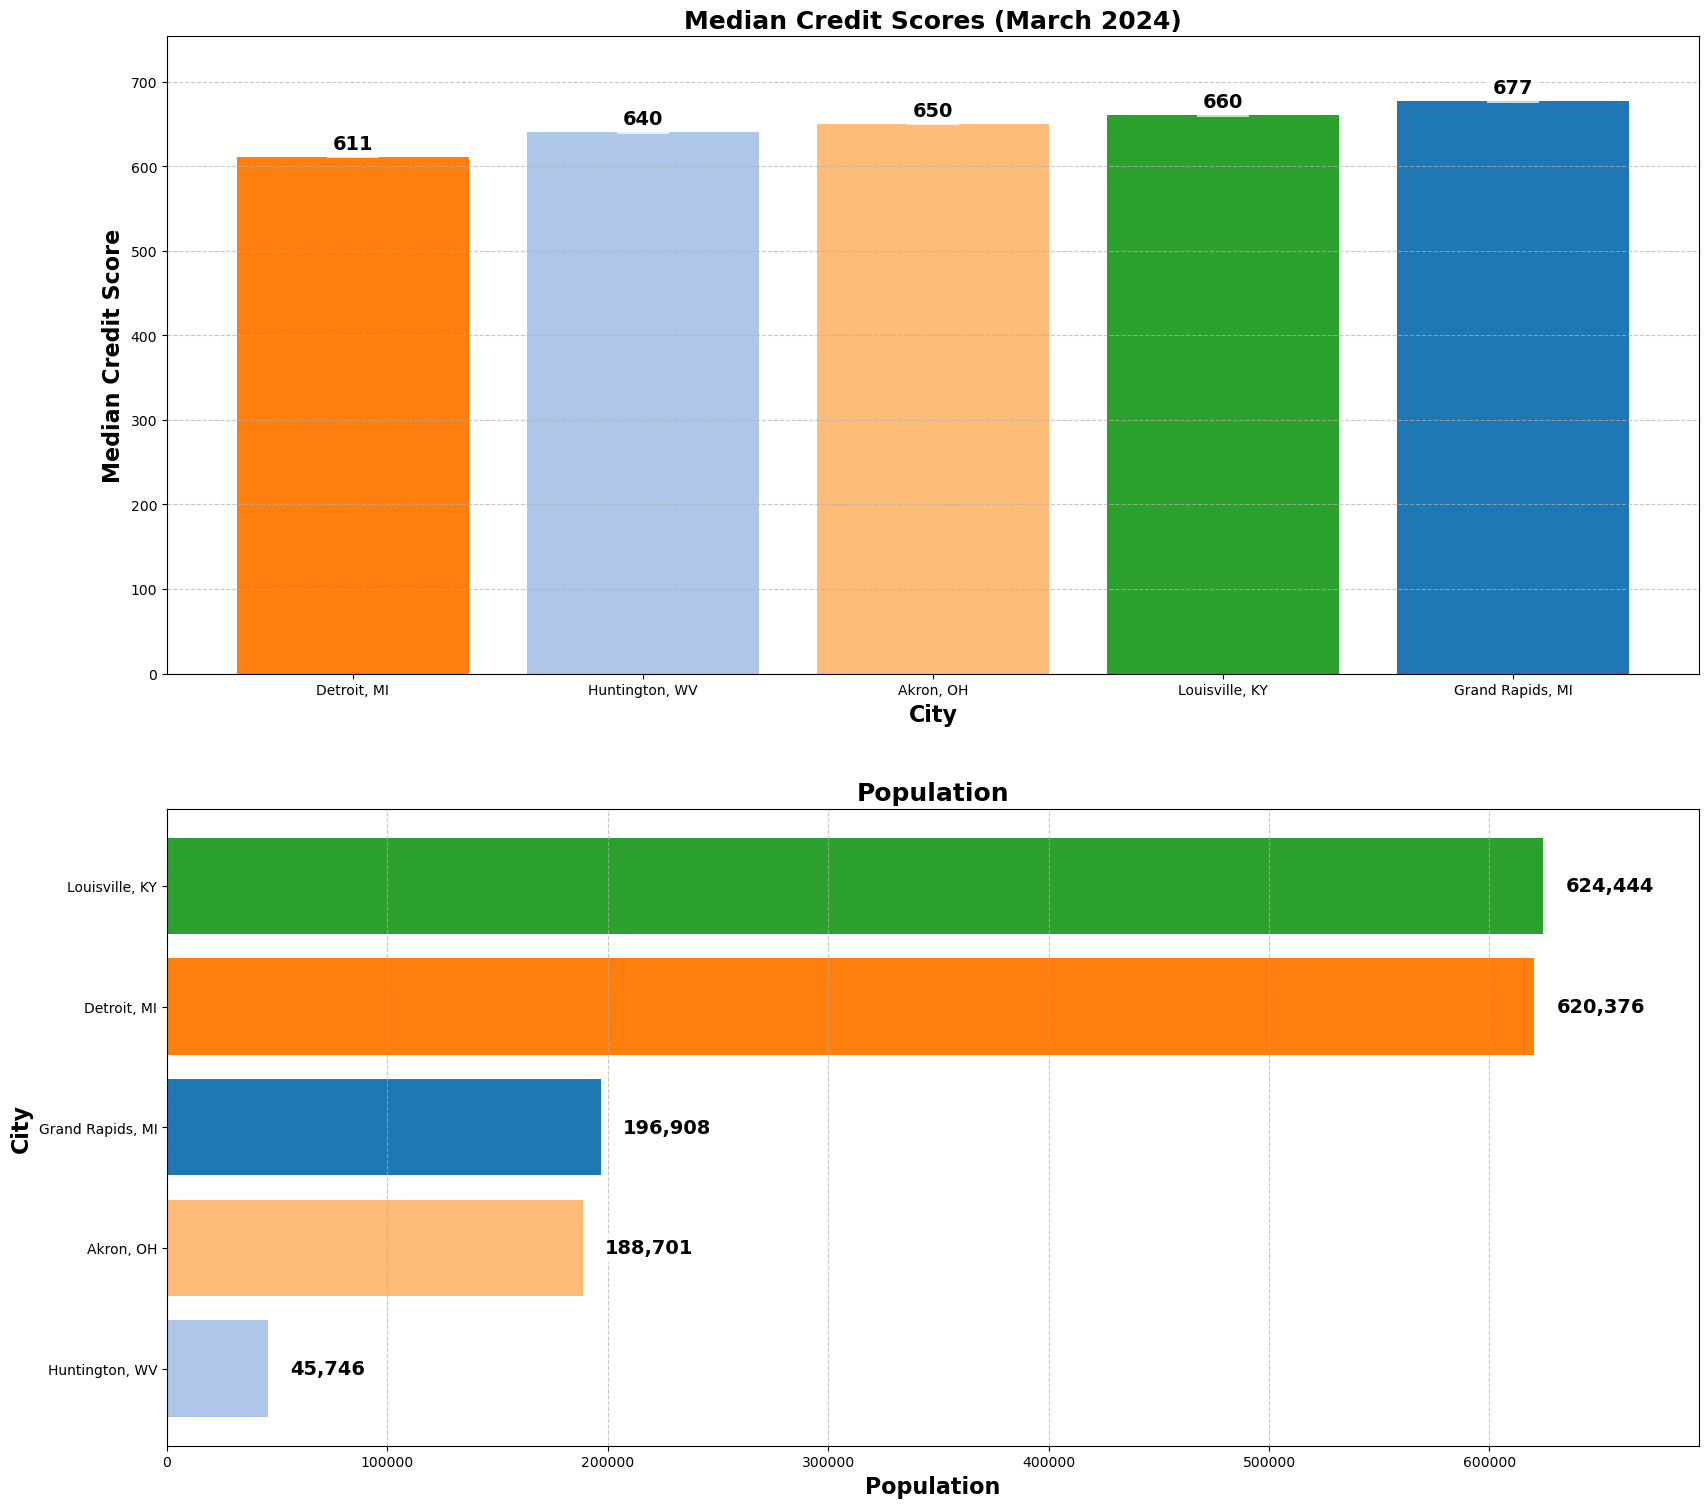

In [110]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    "City": ["Grand Rapids, MI", "Huntington, WV", "Detroit, MI", "Akron, OH", "Louisville, KY"],
    "Median Credit Score": [677, 640, 611, 650, 660],
    "Population": [196908, 45746, 620376, 188701, 624444]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by Median Credit Score in ascending order
df_sorted_credit = df.sort_values(by="Median Credit Score", ascending=True)

# Sort DataFrame by Population in ascending order
df_sorted_population = df.sort_values(by="Population", ascending=True)

# Define colors for each city
colors = plt.cm.tab20.colors
color_map = {city: colors[i] for i, city in enumerate(df["City"])}

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 16))

# Plot Median Credit Score
bars1 = ax1.bar(df_sorted_credit["City"], df_sorted_credit["Median Credit Score"],
                color=[color_map[city] for city in df_sorted_credit["City"]])
ax1.set_title('Median Credit Scores (March 2024)', fontsize=18, fontweight='bold')
ax1.set_xlabel('City', fontsize=16, fontweight='bold')
ax1.set_ylabel('Median Credit Score', fontsize=16, fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate Median Credit Score bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval}', ha='center', va='bottom',
             fontsize=14, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
ax1.set_ylim(0, ax1.get_ylim()[1] * 1.06)  # Increase upper limit by 6%


# Plot Population
bars2 = ax2.barh(df_sorted_population["City"], df_sorted_population["Population"],
                 color=[color_map[city] for city in df_sorted_population["City"]])
ax2.set_title('Population', fontsize=18, fontweight='bold')
ax2.set_xlabel('Population', fontsize=16, fontweight='bold')
ax2.set_ylabel('City', fontsize=16, fontweight='bold')
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate Population bars
for bar in bars2:
    xval = bar.get_width()
    ax2.text(xval + 10000, bar.get_y() + bar.get_height()/2, f'{xval:,}', va='center', ha='left',
             fontsize=14, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
ax2.set_xlim(0, ax2.get_xlim()[1] * 1.06)  # Increase upper limit by 6%

# Adjust layout to avoid overlap
plt.tight_layout(pad=4.0)

# Show the plot
plt.show()
